In this notebook we'll look at FSD metrics from one run

I remapped the output with CDO so I can plot contours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
xr.set_options(keep_attrs=True)
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [2]:
ds = xr.open_dataset('/glade/scratch/lettier/cesm23iws1tsks_ml_lr/run/cesm23iws1tsks_ml_lr.cice.h1.1980-01-05.remap1deg.nc').squeeze()

In [3]:
name = 'cesm23iw 1980-01-05'

In [4]:
for var in ds:
    if '_d' in var:
        ds = ds.rename({var:var[:-2]})

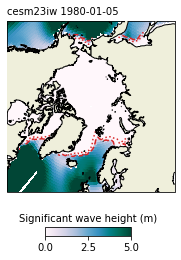

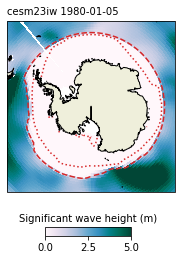

In [8]:
fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, 55, 90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.wave_sig_ht, cmap =plt.cm.PuBuGn, vmin=0., vmax=5.,transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Significant wave height (m)',fontsize=10)
plt.show()
plt.close()

fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -55, -90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.wave_sig_ht.where(ds.latitude<0.),  cmap =plt.cm.PuBuGn, vmin=0., vmax=5.,transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Significant wave height (m)',fontsize=10)
plt.show()
plt.close()

/glade/u/home/vcooper/miniconda3/envs/camus/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


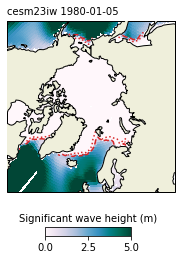

/glade/u/home/vcooper/miniconda3/envs/camus/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


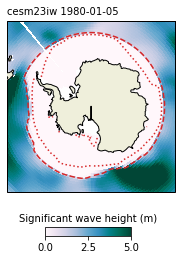

In [5]:
fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, 55, 90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.wave_sig_ht, cmap =plt.cm.PuBuGn, vmin=0., vmax=5.,transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Significant wave height (m)',fontsize=10)
plt.show()
plt.close()

fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -55, -90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.wave_sig_ht.where(ds.latitude<0.),  cmap =plt.cm.PuBuGn, vmin=0., vmax=5.,transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Significant wave height (m)',fontsize=10)
plt.show()
plt.close()

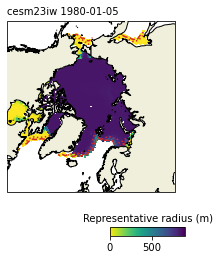

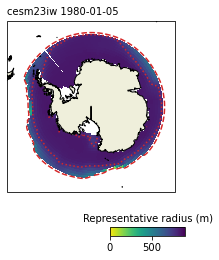

In [9]:
fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, 55, 90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.where(ds.aice>0.15).fsdrad, vmin=0, vmax = 900, cmap = plt.cm.viridis_r, transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.6, 0.05, 0.35, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Representative radius (m)',fontsize=10)
plt.show()
plt.close()

fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -55, -90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, ds.where(ds.aice>0.15).fsdrad.where(ds.latitude<0.), vmin=0, vmax = 900, cmap = plt.cm.viridis_r, transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:red','tab:red'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.6, 0.05, 0.35, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Representative radius (m)',fontsize=10)
plt.show()
plt.close()

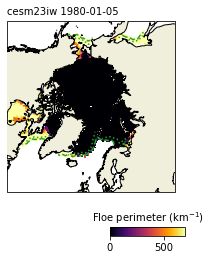

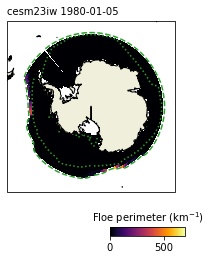

In [10]:
fig = plt.figure(figsize=(3,4))
ax = plt.subplot(1,1,1,projection =ccrs.NorthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, 55, 90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, 1000.*ds.where(ds.aice>0.15).fsdperim, cmap = plt.cm.inferno, vmin=0., vmax=700, transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:green','tab:green'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.6, 0.05, 0.35, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Floe perimeter (km$^{-1}$)',fontsize=10)
plt.show()
plt.close()

fig = plt.figure(figsize=(3,4))

ax = plt.subplot(1,1,1,projection =ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -55, -90], crs=ccrs.PlateCarree())
ax.set_title(name,fontsize=10,loc='left')
CS1 = ax.pcolormesh(ds.longitude, ds.latitude, 1000.*ds.where(ds.aice>0.15).fsdperim.where(ds.latitude<0.),cmap = plt.cm.inferno, vmin=0., vmax=700, transform=ccrs.PlateCarree())       
ax.contour(ds.longitude, ds.latitude, ds.aice,  levels=[.15,.8], colors=['tab:green','tab:green'],linestyles=['--',':'],transform=ccrs.PlateCarree())       
    
    
plt.tight_layout()
plt.subplots_adjust(bottom=.12)
cbar_ax = fig.add_axes([0.6, 0.05, 0.35, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(CS1, cax=cbar_ax,  orientation='horizontal')
cbar.ax.set_title('Floe perimeter (km$^{-1}$)',fontsize=10)
plt.show()
plt.close()

In [6]:
ds = xr.open_dataset('/glade/scratch/lettier/cesm23iws1tsks_ml_lr/run/cesm23iws1tsks_ml_lr.cice.h1.1980-01-05.nc').squeeze()
for var in ds:
    if '_d' in var:
        ds = ds.rename({var:var[:-2]})

In [7]:
def get_num_fsd_tend(ds):
      
    dafsd_var_dr = 24.*ds[dafsd_varnames] # day^-1 (if timestep=1h)
    dv_num_fsd = dafsd_var_dr/(floe_area_c*floe_binwidth)  #day^-1 m^-2
    num_fsd = ds['afsd']/floe_area_c
    
    ice_area = ds.tarea.where(ds.TLAT>0).where(ds['aice']>0.001)
    num_fsd_nh = (1000000.*num_fsd*ds.tarea.where(ds.TLAT>0)).sum(dim=('ni','nj'))/ice_area.sum(dim=('ni','nj')) #units m^-1 km^-2
    dv_num_fsd_nh = (1000000.*dv_num_fsd*ds.tarea.where(ds.TLAT>0)).sum(dim=('ni','nj'))/ice_area.sum(dim=('ni','nj')) #units m^-1 km^-2 day^-1

    ice_area = ds.tarea.where(ds.TLAT<0).where(ds['aice']>0.001)
    num_fsd_sh = (1000000.*num_fsd*ds.tarea.where(ds.TLAT<0)).sum(dim=('ni','nj'))/ice_area.sum(dim=('ni','nj')) #units m^-1 m^-2
    dv_num_fsd_sh = (1000000.*dv_num_fsd*ds.tarea.where(ds.TLAT<0)).sum(dim=('ni','nj'))/ice_area.sum(dim=('ni','nj')) #units m^-1 jm^-2 day^-1

    num_fsd_hemi = [num_fsd_nh, num_fsd_sh]
    dv_num_fsd_hemi = [dv_num_fsd_nh, dv_num_fsd_sh]
    
    return num_fsd_hemi, dv_num_fsd_hemi


In [8]:
# for plotting
colors = ['#1b9e77', '#000080', '#FFA500', 'skyblue','tomato']
ms=['o','>']
linestyles=['-','-','--','--','--','-']
myh=['NH','SH']
dvar_labels = ['Lat. melt','Lat. growth', 'New ice', 'Welding','Wave fracture']
nv = len(dvar_labels)
dafsd_varnames = ['dafsd_latm','dafsd_latg','dafsd_newi','dafsd_weld','dafsd_wave']

floe_rad_c = np.asarray([2.68840422853827477, 9.79844713211059570, 21.6721272468566895, 40.7349405288696289,
                         70.1406764984130859, 113.693801879882812, 175.577110290527344, 259.836509704589844,
                         369.620162963867188, 506.240142822265625, 668.209136962890625, 850.476928710937500])
floe_binwidth = np.asarray([5.24380845576524734, 8.97627735137939453, 14.7710828781127930, 23.3545436859130859,
                            35.4569282531738281, 51.6493225097656250, 72.1172943115234375, 96.4015045166015625,
                            123.165802001953125, 150.074157714843750, 173.863830566406250, 190.671752929687500])

floe_binwidth = xr.DataArray(floe_binwidth,dims=['nkfsd'], coords = {'nkfsd':ds.nkfsd})
floe_rad_c = xr.DataArray(floe_rad_c,dims=['nkfsd'], coords = {'nkfsd':ds.nkfsd})

nfsd = len(floe_rad_c)
floe_area_c = xr.DataArray(4.*.66*np.square(floe_rad_c),dims=['nkfsd'], coords = {'nkfsd':ds.nkfsd})

  

In [9]:
num_fsd_hemi, dv_num_fsd_hemi = get_num_fsd_tend(ds)

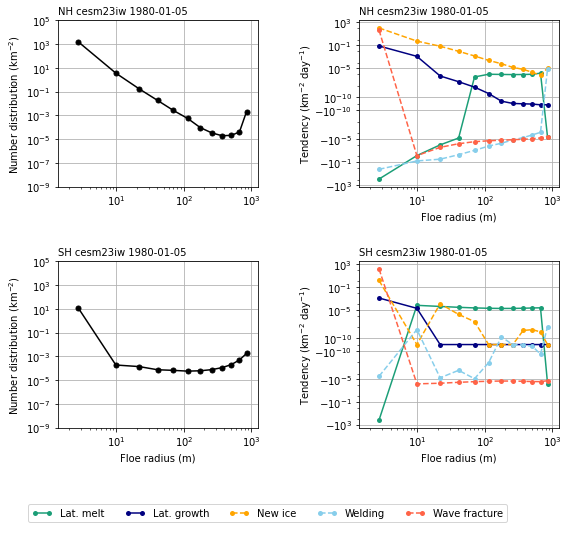

In [15]:
# Annual mean hemispheric number FSD and number FSD tendency


fig = plt.figure(figsize=(8,8))
handles = []
for h in range(2):
    
    ax = plt.subplot(2,2,2*h+1)
    ax.loglog(floe_rad_c,num_fsd_hemi[h],linewidth=1.5,marker='o',markersize=5,c='black')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.get_xaxis().get_major_formatter().labelOnlyBase = False
    ax.get_yaxis().get_major_formatter().labelOnlyBase = False
    ax.set_ylabel(r'Number distribution (km$^{-2}$)')
    if h==1:
        ax.set_xlabel('Floe radius (m)')
    ax.set_title(myh[h]+' '+name,loc='left', fontsize=10)
    ax.set_ylim([10e-10,10e3])
    ax.set_yticks([10e-10,10e-8, 10e-6, 10e-4, 10e-2, 10e0, 10e2, 10e4])
    ax.set_xlim([np.min(floe_rad_c)*.5,1.5*np.max(floe_rad_c)])
    plt.grid()

    ax = plt.subplot(2,2,2*h+2)
    for v in range(nv):
        myl, = ax.plot(floe_rad_c, dv_num_fsd_hemi[h][dafsd_varnames[v]], #label=dvar_labels[v],linewidth=1.5,
        color=colors[v],linestyle=linestyles[v], marker='o', markersize=5, markeredgewidth=0)
        if h==0:
            handles.append(myl)
        
        ax.set_xlabel('Floe radius (m)',fontsize=10)
        ax.set_title(myh[h]+' '+name, loc='left', fontsize=10)
        ax.set_xscale('log')
        ax.set_yscale('symlog', linthreshy=1e-10)
        ax.set_yticks([-10e2,-10e-2,-10e-6,-10e-11,10e-11, 10e-6,  10e-2, 10e2 ])
        ax.set_xlim([np.min(floe_rad_c)*.5,1.5*np.max(floe_rad_c)])
        ax.set_ylabel('Tendency '+r'(km$^{-2}$ day$^{-1}$)',fontsize=10, labelpad=.07)
        plt.grid()

plt.tight_layout()
plt.subplots_adjust(wspace=.5, hspace=.45, bottom=.25)
lgd = fig.legend(handles, dvar_labels, loc = (0.05,0.05), fontsize=10, ncol=5, numpoints = 2)
plt.show()

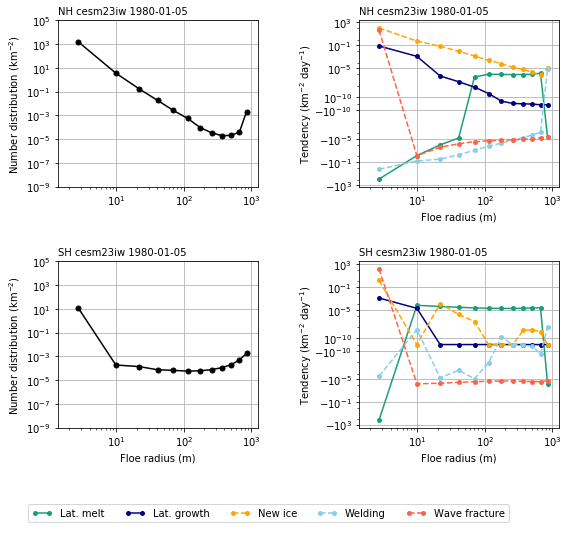

In [10]:
# Annual mean hemispheric number FSD and number FSD tendency


fig = plt.figure(figsize=(8,8))
handles = []
for h in range(2):
    
    ax = plt.subplot(2,2,2*h+1)
    ax.loglog(floe_rad_c,num_fsd_hemi[h],linewidth=1.5,marker='o',markersize=5,c='black')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.get_xaxis().get_major_formatter().labelOnlyBase = False
    ax.get_yaxis().get_major_formatter().labelOnlyBase = False
    ax.set_ylabel(r'Number distribution (km$^{-2}$)')
    if h==1:
        ax.set_xlabel('Floe radius (m)')
    ax.set_title(myh[h]+' '+name,loc='left', fontsize=10)
    ax.set_ylim([10e-10,10e3])
    ax.set_yticks([10e-10,10e-8, 10e-6, 10e-4, 10e-2, 10e0, 10e2, 10e4])
    ax.set_xlim([np.min(floe_rad_c)*.5,1.5*np.max(floe_rad_c)])
    plt.grid()

    ax = plt.subplot(2,2,2*h+2)
    for v in range(nv):
        myl, = ax.plot(floe_rad_c, dv_num_fsd_hemi[h][dafsd_varnames[v]], #label=dvar_labels[v],linewidth=1.5,
        color=colors[v],linestyle=linestyles[v], marker='o', markersize=5, markeredgewidth=0)
        if h==0:
            handles.append(myl)
        
        ax.set_xlabel('Floe radius (m)',fontsize=10)
        ax.set_title(myh[h]+' '+name, loc='left', fontsize=10)
        ax.set_xscale('log')
        ax.set_yscale('symlog', linthreshy=1e-10)
        ax.set_yticks([-10e2,-10e-2,-10e-6,-10e-11,10e-11, 10e-6,  10e-2, 10e2 ])
        ax.set_xlim([np.min(floe_rad_c)*.5,1.5*np.max(floe_rad_c)])
        ax.set_ylabel('Tendency '+r'(km$^{-2}$ day$^{-1}$)',fontsize=10, labelpad=.07)
        plt.grid()

plt.tight_layout()
plt.subplots_adjust(wspace=.5, hspace=.45, bottom=.25)
lgd = fig.legend(handles, dvar_labels, loc = (0.05,0.05), fontsize=10, ncol=5, numpoints = 2)
plt.show()